<font size="4"><b>In SAP, Association rule mining was originally introduced as part of PAL library(predictive analytics library). Association rule is often required in SAP CRM marketing analytics and basically marketing analytics in general.  Here  we would use python to implement association rule on SAP data and add visualizations including scatterplot,histogram and heatmap on the metrics of association rule for better understanding . We would utilize association rule on a separate Market Basket Analysis project  where we would implement unsupervised Machine learning algorithm(clustering).  To learn more on Association rule please click on this SAP Help link::https://help.sap.com/docs/SAP_PREDICTIVE_ANALYTICS/5aac196a006343d6a973f98a625c7386/119babd636a2452e818998b6d11fd8ab.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
new_df = pd.read_excel('/content/drive/MyDrive/Market Basket Analysis/Association Rules + AR  on sap data/Association new.xlsx')
new_df.head()

,Sales Doc.,Created on,SaTy,SOrg.,Material
0,1025166313,2020-01-28,ZOR,AB00,393251
1,1025166313,2020-01-28,ZOR,AB00,392168
2,1025166313,2020-01-28,ZOR,AB00,393253
3,1025166313,2020-01-28,ZOR,AB00,133723
4,1025166313,2020-01-28,ZOR,AB00,106834


In [4]:
new_df.shape

(1048575, 5)

In [5]:
new_df.head()

,Sales Doc.,Created on,SaTy,SOrg.,Material
0,1025166313,2020-01-28,ZOR,AB00,393251
1,1025166313,2020-01-28,ZOR,AB00,392168
2,1025166313,2020-01-28,ZOR,AB00,393253
3,1025166313,2020-01-28,ZOR,AB00,133723
4,1025166313,2020-01-28,ZOR,AB00,106834


In [6]:
new_df.columns = ["SalesDoc","CreatedOn","DocType","SalesOrg","Material"]

In [7]:
new_df.head()

,SalesDoc,CreatedOn,DocType,SalesOrg,Material
0,1025166313,2020-01-28,ZOR,AB00,393251
1,1025166313,2020-01-28,ZOR,AB00,392168
2,1025166313,2020-01-28,ZOR,AB00,393253
3,1025166313,2020-01-28,ZOR,AB00,133723
4,1025166313,2020-01-28,ZOR,AB00,106834


In [8]:
new_df.drop(columns=["CreatedOn","DocType","SalesOrg"],inplace=True)
new_df.head()

,SalesDoc,Material
0,1025166313,393251
1,1025166313,392168
2,1025166313,393253
3,1025166313,133723
4,1025166313,106834


In [9]:
n_items = new_df.groupby("SalesDoc").count()["Material"]

In [10]:
n_items

SalesDoc
1020114249      1
1020114250      1
1020114251      1
1020114252      1
1020114253      1
             ... 
1025545863     41
1025546807      8
1025546808      1
1025546809     21
1025546811    146
Name: Material, Length: 98836, dtype: int64

In [11]:
type(n_items)

pandas.core.series.Series

In [12]:
new_df.groupby("SalesDoc").count()

,Material
SalesDoc,
1020114249,1
1020114250,1
1020114251,1
1020114252,1
1020114253,1
...,...
1025545863,41
1025546807,8
1025546808,1


In [13]:
new_df.head()

,SalesDoc,Material
0,1025166313,393251
1,1025166313,392168
2,1025166313,393253
3,1025166313,133723
4,1025166313,106834


In [14]:
n_items.loc[1025166313]

30

In [15]:
def RetCount(x):
    return n_items.loc[x["SalesDoc"]]

In [16]:
new_df["CartSize"] = new_df.apply(RetCount,axis=1)

In [17]:
new_df.head()

,SalesDoc,Material,CartSize
0,1025166313,393251,30
1,1025166313,392168,30
2,1025166313,393253,30
3,1025166313,133723,30
4,1025166313,106834,30


In [18]:
new_df.shape

(1048575, 3)

In [19]:
#Remove the Sales documents which has less than 2 items & more than 25 items
data_prep = (new_df[~((new_df["CartSize"] < 2) | (new_df["CartSize"] > 25)) ]).copy()

In [20]:
new_df["CartSize"].min(),new_df["CartSize"].max()

(1, 395)

In [21]:
data_prep["CartSize"].min(),data_prep["CartSize"].max()

(2, 25)

In [22]:
data_prep.head()

,SalesDoc,Material,CartSize
30,1025045550,106832,13
31,1025045550,106834,13
32,1025045550,230159,13
33,1025045550,106618,13
34,1025045550,236517,13


In [23]:
data_prep.drop(columns="CartSize",inplace=True)
data_prep.head()

,SalesDoc,Material
30,1025045550,106832
31,1025045550,106834
32,1025045550,230159
33,1025045550,106618
34,1025045550,236517


In [24]:
data_prep["count"] = 1

In [25]:
data_prep.head()

,SalesDoc,Material,count
30,1025045550,106832,1
31,1025045550,106834,1
32,1025045550,230159,1
33,1025045550,106618,1
34,1025045550,236517,1


In [26]:
dataprep = data_prep.groupby(["SalesDoc","Material"]).sum().groupby(level=0).cumsum()

In [27]:
dataprep

count
SalesDoc   Material       
1020114270 106637        1
           106642        2
           106644        3
           473785        4
1020114274 66470         1
...                    ...
1025546809 413994       17
           414711       18
           422309       19
           948379       20
           948526       21

[578542 rows x 1 columns]

In [28]:
dataprep.reset_index(inplace=True)

In [29]:
dataprep.head()

,SalesDoc,Material,count
0,1020114270,106637,1
1,1020114270,106642,2
2,1020114270,106644,3
3,1020114270,473785,4
4,1020114274,66470,1


In [30]:
def pivot_prep(x):
    return str("Material_"+str(x['count']))

In [31]:
dataprep["Pivot"] = dataprep.apply(pivot_prep,axis=1)

In [32]:
dataprep.head()

,SalesDoc,Material,count,Pivot
0,1020114270,106637,1,Material_1
1,1020114270,106642,2,Material_2
2,1020114270,106644,3,Material_3
3,1020114270,473785,4,Material_4
4,1020114274,66470,1,Material_1


In [33]:
dataprep.drop(columns="count",inplace=True)
dataprep.head()

,SalesDoc,Material,Pivot
0,1020114270,106637,Material_1
1,1020114270,106642,Material_2
2,1020114270,106644,Material_3
3,1020114270,473785,Material_4
4,1020114274,66470,Material_1


In [34]:
dataprep = dataprep.pivot(index="SalesDoc",columns="Pivot",values="Material")

In [35]:
dataprep.head()

Pivot,Material_1,Material_10,Material_11,Material_12,Material_13,Material_14,Material_15,Material_16,Material_17,Material_18,...,Material_23,Material_24,Material_25,Material_3,Material_4,Material_5,Material_6,Material_7,Material_8,Material_9
SalesDoc,,,,,,,,,,,,,,,,,,,,,
1020114270,106637.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,106644.0,473785.0,NaN,NaN,NaN,NaN,NaN
1020114274,66470.0,388925.0,427021.0,902910.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,106641.0,106644.0,232376.0,232378.0,313522.0,313524.0,328773.0
1020114283,232408.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,293020.0,NaN,NaN,NaN,NaN,NaN,NaN
1020114284,232408.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,293020.0,NaN,NaN,NaN,NaN,NaN,NaN
1020114285,232408.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,293020.0,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
dataprep_new = dataprep[["Material_1","Material_2","Material_3","Material_4","Material_5","Material_6","Material_7","Material_8","Material_9",
         "Material_10","Material_11","Material_12","Material_13","Material_14","Material_15","Material_16","Material_17","Material_18",
         "Material_19","Material_20","Material_21","Material_22","Material_23","Material_24","Material_25"]]

In [37]:
dataprep_new.head()

Pivot,Material_1,Material_2,Material_3,Material_4,Material_5,Material_6,Material_7,Material_8,Material_9,Material_10,...,Material_16,Material_17,Material_18,Material_19,Material_20,Material_21,Material_22,Material_23,Material_24,Material_25
SalesDoc,,,,,,,,,,,,,,,,,,,,,
1020114270,106637.0,106642.0,106644.0,473785.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020114274,66470.0,106637.0,106641.0,106644.0,232376.0,232378.0,313522.0,313524.0,328773.0,388925.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020114283,232408.0,232409.0,293020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020114284,232408.0,232409.0,293020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020114285,232408.0,232409.0,293020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#dataprep_new.to_csv("Ready1.csv",index=False,header=False)

In [39]:
# empty DataFrame
all_txns = []

# Convert DataFrame to a list of lists
data_list = dataprep_new.values.tolist()

# Process the data similarly to the second Python script
for each_txn in data_list:
    # each_txn is a list, but your second script assumes a string with commas
    # we don't need to split by comma, but we convert all elements to string just in case
    each_txn = [str(i) for i in each_txn if i == i]

    # This code removes any blanks, assuming blanks are empty strings
    all_txns.append([i for i in each_txn if i])

# Display the first 5 transactions
all_txns[0:5]


[['106637.0', '106642.0', '106644.0', '473785.0'],
 ['66470.0',
  '106637.0',
  '106641.0',
  '106644.0',
  '232376.0',
  '232378.0',
  '313522.0',
  '313524.0',
  '328773.0',
  '388925.0',
  '427021.0',
  '902910.0'],
 ['232408.0', '232409.0', '293020.0'],
 ['232408.0', '232409.0', '293020.0'],
 ['232408.0', '232409.0', '293020.0']]

In [40]:
from mlxtend.frequent_patterns import apriori,association_rules
one_hot_encoding = TransactionEncoder()
one_hot_txns = one_hot_encoding.fit(all_txns).transform(all_txns)
one_hot_txns.shape

(72269, 10507)

In [41]:
one_hot_txns


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [42]:
one_hot_txns  = one_hot_txns.astype("int")
one_hot_txns

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [43]:
one_hot_encoding.columns_

['100320.0',
 '100370.0',
 '100575.0',
 '100746.0',
 '100785.0',
 '100789.0',
 '101093.0',
 '1014.0',
 '101581.0',
 '101583.0',
 '101661.0',
 '101972.0',
 '1020.0',
 '102192.0',
 '102194.0',
 '102537.0',
 '102636.0',
 '10266.0',
 '10282.0',
 '102868.0',
 '103010.0',
 '103519.0',
 '10352.0',
 '10355.0',
 '103996.0',
 '10411.0',
 '10561.0',
 '10590.0',
 '10619.0',
 '106481.0',
 '106482.0',
 '106483.0',
 '106564.0',
 '106565.0',
 '106566.0',
 '106568.0',
 '106569.0',
 '106610.0',
 '106618.0',
 '106619.0',
 '106637.0',
 '106641.0',
 '106642.0',
 '106643.0',
 '106644.0',
 '106656.0',
 '106658.0',
 '106673.0',
 '106675.0',
 '106676.0',
 '106678.0',
 '106679.0',
 '106681.0',
 '106682.0',
 '106684.0',
 '106691.0',
 '106693.0',
 '106694.0',
 '106695.0',
 '106702.0',
 '106703.0',
 '106704.0',
 '106705.0',
 '106706.0',
 '106709.0',
 '106710.0',
 '106712.0',
 '106713.0',
 '106724.0',
 '106726.0',
 '106727.0',
 '106728.0',
 '106729.0',
 '106731.0',
 '106791.0',
 '106794.0',
 '106803.0',
 '106804.0'

In [44]:
one_hot_txns_df = pd.DataFrame(one_hot_txns,columns = one_hot_encoding.columns_)
one_hot_txns_df.head()

,100320.0,100370.0,100575.0,100746.0,100785.0,100789.0,101093.0,1014.0,101581.0,101583.0,...,98868.0,98949.0,99126.0,99206.0,99286.0,9994.0,9997.0,99978.0,9998.0,9999.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
len(one_hot_txns_df.columns)

10507

In [46]:
one_hot_txns_df = one_hot_txns_df.astype('bool')
frequent_itemsets = apriori(one_hot_txns_df, min_support=0.01 , use_colnames=True)

In [47]:
frequent_itemsets.sample(10,random_state = 10)

,support,itemsets
95,0.035824,(489.0)
10,0.014059,(106831.0)
5,0.011734,(106641.0)
59,0.025696,(319272.0)
116,0.026443,(87661.0)
19,0.025917,(164161.0)
90,0.011637,(479635.0)
47,0.012052,(292989.0)
2,0.058767,(106566.0)
145,0.012509,"(106694.0, 230160.0)"


In [48]:
rules = association_rules(frequent_itemsets,
                         metric = "lift",
                         min_threshold=1)
rules.sample(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(230159.0),(106566.0),0.062862,0.058767,0.013256,0.210874,3.588331,0.009562,1.192754
75,(230161.0),(230163.0),0.065893,0.055875,0.014861,0.225535,4.036460,0.011179,1.219069
51,(230161.0),(230159.0),0.065893,0.062862,0.021171,0.321294,5.111064,0.017029,1.380770
107,(232409.0),(293020.0),0.072147,0.037540,0.016729,0.231876,6.176714,0.014021,1.253000
24,(106694.0),(106675.0),0.059652,0.029916,0.015553,0.260728,8.715346,0.013768,1.312216


# Visualization of the metrics using scatterplot, histogram and heatmap

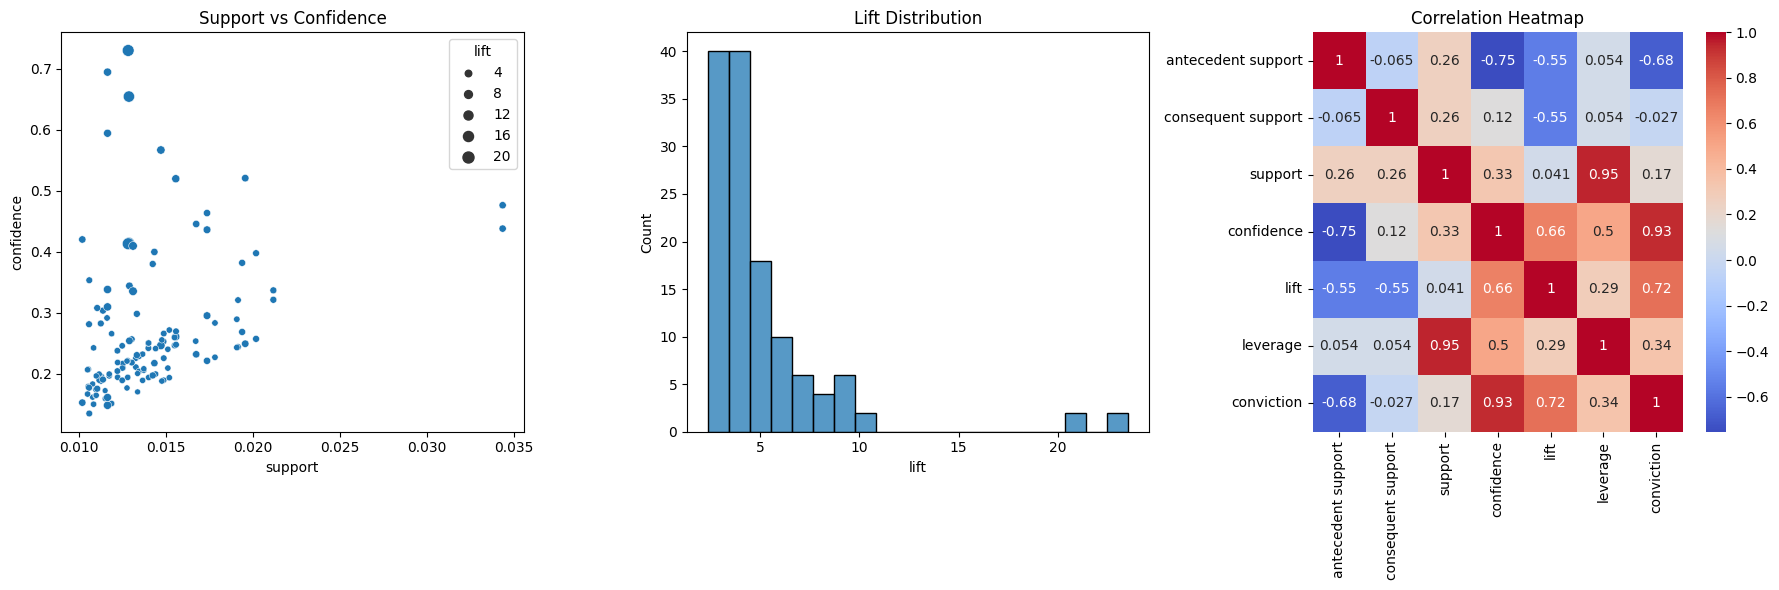

In [49]:
fig, axs = plt.subplots(1, 3, figsize=(18,6)) # 1 row, 3 columns

# Scatter plot of support and confidence
sns.scatterplot(x="support", y="confidence", size="lift", data=rules, ax=axs[0])
axs[0].set_title("Support vs Confidence")

# Histogram of Lift
sns.histplot(rules['lift'], bins=20, kde=False, ax=axs[1])
axs[1].set_title('Lift Distribution')

# Heatmap of correlations between different metrics (excluding frozenset(immutable) columns ie antecedents and consequents)

metric_columns = ['antecedent support', 'consequent support', 'support', 'confidence', 'lift', 'leverage', 'conviction']
sns.heatmap(rules[metric_columns].corr(), annot=True, cmap='coolwarm', ax=axs[2])
axs[2].set_title('Correlation Heatmap')

plt.tight_layout() # adjusts subplot params so that subplots are nicely fit in the figure
plt.show()



In [50]:
rules.sort_values("lift", ascending=False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
121,(393253.0),(392162.0),0.017546,0.031009,0.012813,0.730284,23.550597,0.012269,3.592633
120,(392162.0),(393253.0),0.031009,0.017546,0.012813,0.413208,23.550597,0.012269,1.674282
118,(393251.0),(392162.0),0.019635,0.031009,0.012855,0.654686,21.112687,0.012246,2.806118
119,(392162.0),(393251.0),0.031009,0.019635,0.012855,0.414547,21.112687,0.012246,1.674541
122,(59572.0),(9415.0),0.039035,0.031950,0.013090,0.335342,10.495815,0.011843,1.456463
123,(9415.0),(59572.0),0.031950,0.039035,0.013090,0.409701,10.495815,0.011843,1.627930
28,(106694.0),(164161.0),0.059652,0.025917,0.014695,0.246347,9.505189,0.013149,1.292481
29,(164161.0),(106694.0),0.025917,0.059652,0.014695,0.567005,9.505189,0.013149,2.171728
127,(293020.0),"(232408.0, 232409.0)",0.037540,0.034372,0.011623,0.309620,9.008033,0.010333,1.398692
126,"(232408.0, 232409.0)",(293020.0),0.034372,0.037540,0.011623,0.338164,9.008033,0.010333,1.454227


In [51]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(106566.0),(106565.0),0.058767,0.039782,0.017352,0.295267,7.422146,0.015014,1.362528
1,(106565.0),(106566.0),0.039782,0.058767,0.017352,0.436174,7.422146,0.015014,1.669368
2,(106694.0),(106565.0),0.059652,0.039782,0.011236,0.188355,4.734697,0.008863,1.183052
3,(106565.0),(106694.0),0.039782,0.059652,0.011236,0.282435,4.734697,0.008863,1.310470
4,(232408.0),(106565.0),0.078457,0.039782,0.011596,0.147795,3.715140,0.008474,1.126746
...,...,...,...,...,...,...,...,...,...
125,"(293020.0, 232409.0)",(232408.0),0.016729,0.078457,0.011623,0.694789,8.855681,0.010311,3.019365
126,"(232408.0, 232409.0)",(293020.0),0.034372,0.037540,0.011623,0.338164,9.008033,0.010333,1.454227
127,(293020.0),"(232408.0, 232409.0)",0.037540,0.034372,0.011623,0.309620,9.008033,0.010333,1.398692
128,(232408.0),"(293020.0, 232409.0)",0.078457,0.016729,0.011623,0.148148,8.855681,0.010311,1.154274
